<a href="https://colab.research.google.com/github/xoghd1126/G4-finalproject/blob/main/DLEE_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. Before starting the class**
###1) Students
* Assume students have learned all the content in the text.

###2) Teachers

####Make sure to install all the necessary packages
* Wordcloud: to generate a wordcloud
* Matplotlib: to generate image files
* Gradio: to implement our code as a web-interface application
* GTTs: text-to-audio

####Make sure the apps in the Huggingface are all available(running).

# **1. Summarizing the story (Review of the last class, Group Activity)**
##1) Make a storyboard with Huggingface and upload it to Padlet
* Using the words in the wordcloud, summarize the story 'The Lightkeeper's Lantern' in four sentences.
* If there are some words that you cannot catch up with the meaning, you can use the Gradio app '*Gradio Meaning*' uploaded in the Huggingface.
* Insert each sentence into the Hugging face '*Jayahae/ZB-Tech-Text-to-Image*' and make four images.
* Download all the images, Upload it with four sentences on the Padlet.

#####All the apps you need is in here: https://huggingface.co/Jayahae
#####Upload the works in Padlet : https://padlet.com/mirankim316/digital-literacy-and-english-education-spring-2024-2gmo48o5djxsjpqa

## **QR code for Huggingface**

In [1]:
%%capture
!pip install qrcode[pil]

Enter the link: https://huggingface.co/Jayahae
QR code generated! Saved as qrcode.png


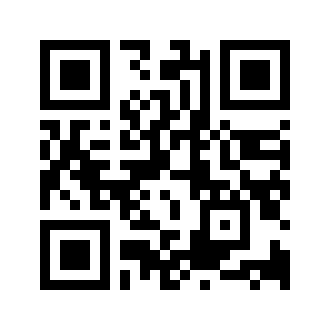

In [2]:
import qrcode
from IPython.display import Image
def generate_qr_code(link, filename="qrcode.png"):
    qr = qrcode.QRCode(version=1, error_correction=qrcode.constants.ERROR_CORRECT_L, box_size=10, border=4)
    qr.add_data(link)
    qr.make(fit=True)
    img = qr.make_image(fill_color="black", back_color="white")
    img.save(filename)
    return filename
link = input("Enter the link: ")
filename = generate_qr_code(link)
print(f"QR code generated! Saved as {filename}")
Image(filename=filename)

## **Wordcloud from the text**

In [3]:
%%capture
!pip install wordcloud matplotlib

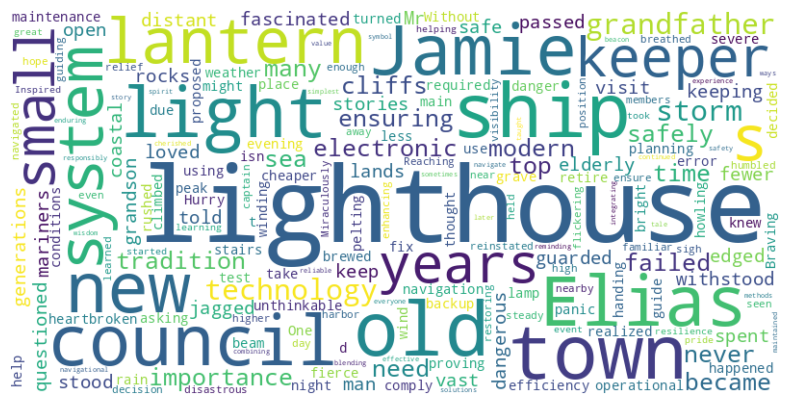

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = """
In a small coastal town edged by jagged cliffs and vast, open sea, stood an old lighthouse that had guarded the mariners for generations. The lighthouse keeper, Mr. Elias, was an elderly man who had spent many years ensuring the light never failed, keeping ships safe from the dangerous rocks below. Elias's grandson, Jamie, loved to visit the lighthouse. He was fascinated by the stories his grandfather told of ships from distant lands and the many storms the lighthouse had withstood. However, over the years, fewer ships passed by, and the town council questioned the need to keep the lighthouse operational. They proposed using modern technology, which was cheaper and required less maintenance. One evening, as a fierce storm brewed, the council decided to test their new electronic navigation system, planning to retire the old lighthouse lamp after proving the new system's efficiency. Elias was heartbroken but knew he had to comply. That night, with the storm at its peak and the new system in place, the unthinkable happened—the electronic system failed due to the severe weather conditions. In a panic, the town council realized their error. Without the lighthouse’s beam, ships at sea would be in grave danger. They rushed to Elias, asking for his help. Elias turned to Jamie, handing him a small, old lantern — a backup they had never thought they’d use. "Hurry, take this to the top! It isn’t as bright, but it might just guide them in until we can fix the main light."
Braving the howling wind and pelting rain, Jamie climbed the winding stairs of the lighthouse with the lantern. Reaching the top, he held the lantern high, its light flickering but steady. All he could do was hope it was enough. Miraculously, the small light was seen by a nearby ship. The captain, familiar with the lighthouse’s position, navigated away from the cliffs just in time, guiding the ship safely into the harbor. The town breathed a sigh of relief, and the council members were humbled by their near-disastrous decision. From that day on, the council reinstated the old lighthouse, restoring it and even enhancing its light to ensure higher visibility. Jamie learned the importance of resilience and tradition, and he took great pride in helping his grandfather. Inspired by the event, he started learning more about navigational technology, combining new methods with the reliable old ways. Years later, Jamie became the lighthouse keeper, just like his grandfather. He maintained the tradition of the lighthouse while integrating modern technology responsibly, ensuring that the lighthouse continued to be a beacon of safety and a symbol of the town’s enduring spirit. The story of the lighthouse keeper’s lantern became a cherished tale, reminding everyone that sometimes, the simplest solutions are the most effective in times of need. It taught the town the value of wisdom, experience, and the importance of blending the old with the new to navigate the future safely.
"""

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **APP for meaning of the word**

In [5]:
%%capture
# Install necessary libraries
!pip install gradio gtts

In [6]:
import gradio as gr
from gtts import gTTS

# Simple dictionary for demonstration purposes
translation_dict = {
    "passed": "지나가버린",
    "beam": "빛줄기",
    "electronic": "전자의",
    "fascinate": "마음을 사로잡다, 매료하다",
    "comply": "따르다",
    "tradition": "전통",
    "guard": "지키다, 보호하다, 경비를 보다",
    "peak": "절정, 정점, 최고조, 꼭대기",
    "maintenance": "유지, 생활비, 지속",
    "harbor": "항구, 항만",
    "condition": "상태, 조건",
    "storm": "폭풍, 태풍",
    "edged": "날이 있는, 가장자리가 있는",
    "decide": "결정하다",
    "elderly": "연세가 드신, 나이가 든",
    "realize": "깨닫다, 알아차리다, 인식하다",
    "modern": "현대적인",
    "grave": "무덤, 묘",
    "generation": "세대",
    "cheaper": "더 싼, 더 저렴한",
    "technology": "기술",
    "fail": "실패하다",
    "proving": "검증하다, 입증하다",
    "require": "요구하다, 필요하다, 요청하다",
    "climb": "오르다, 등반하다",
    "stood": "stand의 과거 분사, 서다, 일어서다",
    "council": "의회",
    "position": "위치, 자리, 배치하다",
    "navigation": "항해, 운항",
    "operation": "작동, 가동, 조작",
    "happen": "(사건 등이) 일어나다",
    "lighthouse": "등대",
    "lantern": "손전등, 랜턴",
    "vast": "어마어마한, 방대한, 막대한",
    "relief": "안도, 안도감",
    "importance": "중요성",
    "grandson": "손자, 외손자",
    "fierce": "사나운, 격렬한, 극심한",
    "panic": "극심한 공포, 겁에 질려 어쩔 줄 모르다",
    "proposed": "제안된",
    "mariner": "선원, 뱃사람",
    "ensure": "반드시 ~하게 하다, 보장하다",
    "responsibly": "책임감 있게",
    "flickering": "깜박거리는, 꺼질 것 같은, 약한",
    "cliff": "절벽",
    "humble": "겸손한, 겸허하게 만들다",
    "severe": "극심한, 가혹한, 엄한",
    "efficiency": "효율, 효율화",
    "familiar": "익숙한",
    "guiding": "인도하는, 안내하는",
    "jagged": "삐쭉삐쭉한, 들쑥날쑥한",
    "decision": "결정, 결단력",
    "disastrous": "처참한, 형편없는",
    "heartbroken": "비통해 하는, 슬픔에 잠긴, 비탄에 젖은",
    "wisdom": "지혜",
    "solution": "해결책",
    "miraculously": "기적적으로",
    "rush": "급히 움직이다, 혼잡, 치밀어 오르다",
    "brewed": "몰아치다",
    "reinstated": "복직하다, 복귀하다",
    "enduring": "오래가는",
    "winding": "구불구불한",
    "unthinkable": "상상도 할 수 없는"
}

# Define the translation and text-to-speech function
def translate_and_speak(word):
    korean_translation = translation_dict.get(word.lower(), "Translation not found")
    tts = gTTS(word, lang='en')  # Set lang to 'en' for English pronunciation
    tts.save("translation.mp3")
    return korean_translation, "translation.mp3"

# Create the Gradio interface with a dropdown
interface = gr.Interface(
    fn=translate_and_speak,
    inputs=gr.Dropdown(choices=list(translation_dict.keys()), label="Select an English word"),
    outputs=[gr.Textbox(label="Korean Translation"), gr.Audio(label="Pronunciation")],
    title="English to Korean Translator",
    description="Select an English word to get its meaning in Korean and listen to the pronunciation."
)

# Launch the interface
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://1099bc806444dbc136.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# **2. Watch a short video(The Lightkeeper's Lantern - summarized version)**

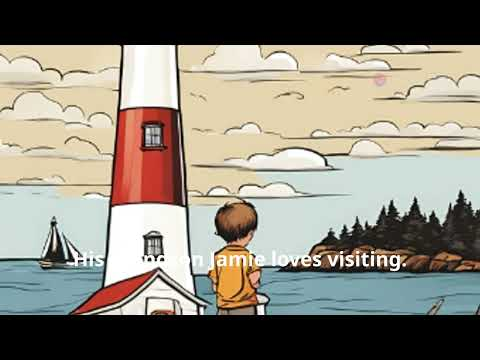

In [7]:
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("-e7V4yPSzUM", width=600)
display(video)

# **3. Studying the Grammar in the text (The main, Individual activity)**

##1) Study the concepts with short slides

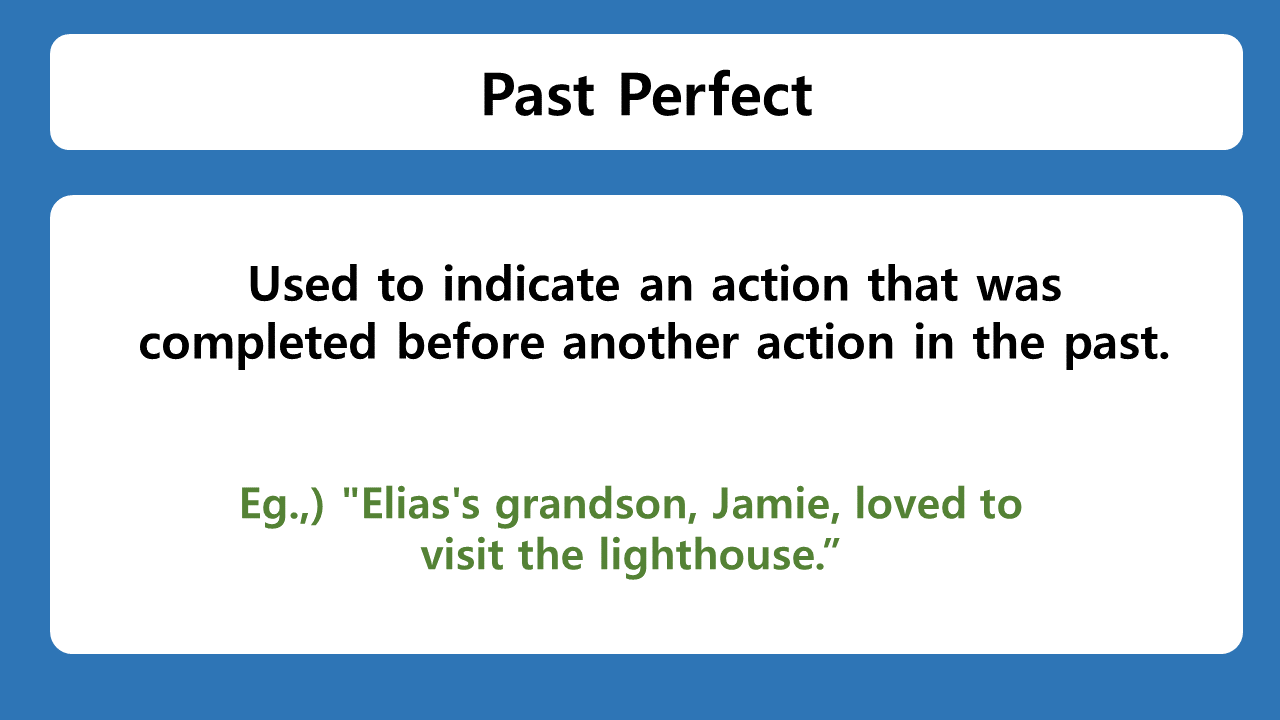

In [8]:
from IPython.display import Image

sid = "3" #@param = [1,2,3,4]

nid = int(sid)-1

urls = [
    "https://raw.githubusercontent.com/xoghd1126/G4-finalproject/main/verb-tense-1.png",
    "https://raw.githubusercontent.com/xoghd1126/G4-finalproject/main/verb-tense-2.png",
    "https://raw.githubusercontent.com/xoghd1126/G4-finalproject/main/verb-tense-3.png",
    "https://raw.githubusercontent.com/xoghd1126/G4-finalproject/main/verb-tense-4.png"
    ]

Image(urls[nid], width ="800", height = "500")

##2) Match the words with the appropriate verb tense

In [9]:
%%capture
pip install -U gradio

In [10]:
import gradio as gr
from PIL import Image, ImageDraw
import requests
from io import BytesIO
import numpy as np

# Load the image from the URL
input_image_url = "https://raw.githubusercontent.com/xoghd1126/G4-finalproject/main/Slide-1.png"
response = requests.get(input_image_url)
image = Image.open(BytesIO(response.content))

# Convert the image to a numpy array
image_np = np.array(image)

# URL of the output image
output_image_url = "https://raw.githubusercontent.com/xoghd1126/G4-finalproject/main/Slide-2.png"

# Function to process the drawing (dummy processing)
def process_drawing(drawing):
    # Fetch the output image
    response = requests.get(output_image_url)
    output_image = Image.open(BytesIO(response.content))

    return output_image

# Create Gradio interface
def create_interface():
    sketchpad = gr.Sketchpad(label="Draw lines to match items", type="numpy", value=image_np)

    interface = gr.Interface(
        fn=process_drawing,
        inputs=[sketchpad],
        outputs="image",  # Correctly specify the output type as "image"
        title="Match the words with the appropriate verb tense"
    )
    return interface

# Create and launch the interface
interface = create_interface()
interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://cce3f5e2e101550e04.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


##3) Fill-in-the-blank quiz


In [11]:
%%capture
!pip install gradio

In [12]:
import gradio as gr

story = "https://raw.githubusercontent.com/MK316/Spring2024/main/Sample/storysample.txt"

cloze_questions = [
    {"question": "Jamie ___ (love) to visit the lighthouse and was fascinated by the stories his grandfather told.", "answer": "loved"},
    {"question": "One evening, as a fierce storm brewed, the council ___ (decide) to test their new electronic navigation system.", "answer": "decided"},
    {"question": "That night, with the storm at its peak and the new system in place, the unthinkable happened—the electronic system ___ (fail) due to the severe weather conditions", "answer": "failed"},
    {"question": "Braving the howling wind and pelting rain, Jamie ______ (climb) the winding stairs of the lighthouse with the lantern.", "answer": "climbed"},
    {"question": "All he ______ (can) do was hope it was enough.", "answer": "could"},
    {"question": "Miraculously, the small light was ______ (see) by a nearby ship. ", "answer": "seen"},
    {"question": "From that day on, the council ______ (reinstate) the old lighthouse, restoring it and even enhancing its light to ensure higher visibility. ", "answer": "reinstated"},
    {"question": "He maintained the tradition of the lighthouse while integrating modern technology responsibly, ensuring that the lighthouse ______ (continue) to be a beacon of safety and a symbol of the town’s enduring spirit.", "answer": "continued"},
    {"question": "The story of the lighthouse keeper’s lantern ___ (become) a cherished tale, reminding everyone that sometimes, the simplest solutions are the most effective in times of need.", "answer": "became"},
    {"question": "The lighthouse keeper, Mr. Elias, ___ (spend) many years ensuring the light never failed, keeping ships safe from the dangerous rocks below”", "answer": "had spent"},
]

def cloze_quiz(name, *answers):
    score = 0
    results = []
    for i, question in enumerate(cloze_questions):
        if answers[i].strip().lower() == question["answer"].lower():
            score += 1
            results.append(f"Question {i+1}: Correct\n")
        else:
            results.append(f"Question {i+1}: Incorrect, the correct answer is: {question['answer']}\n")
    result_text = f"* Name: {name}\n* Score: {score} out of {len(cloze_questions)}\n" + "\n".join(results)

    return result_text

inputs = [gr.Textbox(label="Enter your name")] + [gr.Textbox(label=q["question"]) for q in cloze_questions]
outputs = [gr.Textbox(label="Results")]

iface = gr.Interface(fn=cloze_quiz, inputs=inputs, outputs=outputs, description="The Lightkeeper's Lantern")
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d92b1f3f17d3955135.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# **4. Assignment**
####1. Listen to the native speaker pronounce using the '*Text-to-Speech*' App in the Huggingface: https://huggingface.co/spaces/Jayahae/Text-to-Speech
####2. Read the story and record it with the '*Voice Recording*' App in the Huggingface: https://huggingface.co/spaces/Jayahae/Vocie-Recording
####-> Concentrate on intonation and pronunciation when recording.

####3. Download your work, and send the file to teacher. Your homework is done!

####Teacher's email account: jhxmluv@gmail.com

##1) Text-to-Speech App for listening to the native speaker pronounce

In [13]:
%%capture
!pip install gradio gtts

In [14]:
import gradio as gr
from gtts import gTTS

# Define the text-to-speech function
def text_to_speech(sentence):
    tts = gTTS(sentence)
    tts.save("output.mp3")
    return sentence, "output.mp3"

# Predefined sentences
sentences = [
    "In a small coastal town edged by jagged cliffs and vast, open sea, stood an old lighthouse that had guarded the mariners for generations.",
    "The lighthouse keeper, Mr. Elias, was an elderly man who had spent many years ensuring the light never failed, keeping ships safe from the dangerous rocks below.",
    "Elias's grandson, Jamie, loved to visit the lighthouse.",
    "He was fascinated by the stories his grandfather told of ships from distant lands and the many storms the lighthouse had withstood.",
    "However, over the years, fewer ships passed by, and the town council questioned the need to keep the lighthouse operational.",
    "They proposed using modern technology, which was cheaper and required less maintenance.",
    "One evening, as a fierce storm brewed, the council decided to test their new electronic navigation system, planning to retire the old lighthouse lamp after proving the new system's efficiency.",
    "Elias was heartbroken but knew he had to comply.",
    "That night, with the storm at its peak and the new system in place, the unthinkable happened—the electronic system failed due to the severe weather conditions."
    "In a panic, the town council realized their error. Without the lighthouse’s beam, ships at sea would be in grave danger.",
    "They rushed to Elias, asking for his help. Elias turned to Jamie, handing him a small, old lantern — a backup they had never thought they’d use.",
    "Hurry, take this to the top! It isn’t as bright, but it might just guide them in until we can fix the main light.",
    "Braving the howling wind and pelting rain, Jamie climbed the winding stairs of the lighthouse with the lantern.",
    "Reaching the top, he held the lantern high, its light flickering but steady. All he could do was hope it was enough.",
    "Miraculously, the small light was seen by a nearby ship. The captain, familiar with the lighthouse’s position, navigated away from the cliffs just in time, guiding the ship safely into the harbor.",
    "The town breathed a sigh of relief, and the council members were humbled by their near-disastrous decision.",
    "From that day on, the council reinstated the old lighthouse, restoring it and even enhancing its light to ensure higher visibility.",
    "Jamie learned the importance of resilience and tradition, and he took great pride in helping his grandfather.",
    "Inspired by the event, he started learning more about navigational technology, combining new methods with the reliable old ways.",
    "Years later, Jamie became the lighthouse keeper, just like his grandfather.",
    "He maintained the tradition of the lighthouse while integrating modern technology responsibly, ensuring that the lighthouse continued to be a beacon of safety and a symbol of the town’s enduring spirit.",
    "The story of the lighthouse keeper’s lantern became a cherished tale, reminding everyone that sometimes, the simplest solutions are the most effective in times of need.",
    "It taught the town the value of wisdom, experience, and the importance of blending the old with the new to navigate the future safely."
]

# Create the Gradio interface
interface = gr.Interface(
    fn=text_to_speech,
    inputs=gr.Dropdown(choices=sentences, label="Select a sentence"),
    outputs=[gr.Textbox(label="Selected Sentence"), gr.Audio(type="filepath")],
    title="Text-to-Speech App",
    description="Select a sentence and hear it read aloud using Google Text-to-Speech."
)

# Launch the interface
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://8a97f872614d0f6570.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## 2) Voice Recording App

In [15]:
%%capture
!pip install gradio

In [16]:
import gradio as gr
import numpy as np
import scipy.io.wavfile

def save_audio(audio):
    # The audio parameter is a tuple (sample_rate, data)
    sample_rate, data = audio
    output_file = "recorded_audio.wav"
    scipy.io.wavfile.write(output_file, sample_rate, data)
    return output_file

iface = gr.Interface(
    fn=save_audio,
    inputs=gr.Audio(type="numpy", label="Record your voice"),
    outputs=gr.File(label="Download your recorded audio"),
    title="Voice Recorder",
    description="Record your voice and download the audio file."
)

iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://a7bf047d250a680de5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
